# Dependencies
* Keras, flask, gevent, requests, pillow

In [15]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import flask
import io
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# Define functions
* load_model to load the ResNet CNN model with pretrained weights from ImageNet

In [18]:
def load_model():
    # load the pre-trained Keras model 
    global model
    model = ResNet50(weights="imagenet")

def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)
    # return the processed image
    return image

def predict(image):
    data = {"success": False}
    # preprocess the image and prepare it for classification
    image = prepare_image(image, target=(224, 224))

    # classify the input image and then initialize the list
    # of predictions to return to the client
    preds = model.predict(image)
    results = imagenet_utils.decode_predictions(preds)
    data["predictions"] = []

    # loop over the results and add them to the list of
    # returned predictions
    for (imagenetID, label, prob) in results[0]:
        r = {"label": label, "probability": float(prob)}
        data["predictions"].append(r)

    # indicate that the request was a success
    data["success"] = True
    return data

def demo(imgList):
    for img in imgList:
        img = Image.open(img)
        imshow(np.asarray(img))
        plt.show()
        print(predict(img))

# Test Image Recognition Process Here:

In [3]:
load_model()

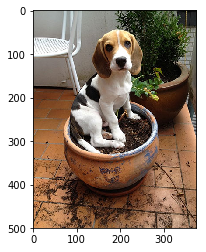

{'success': True, 'predictions': [{'label': 'beagle', 'probability': 0.9901768565177917}, {'label': 'Walker_hound', 'probability': 0.0022487048991024494}, {'label': 'Brittany_spaniel', 'probability': 0.0011901338584721088}, {'label': 'pot', 'probability': 0.0011802854714915156}, {'label': 'Cardigan', 'probability': 0.0006831085775047541}]}


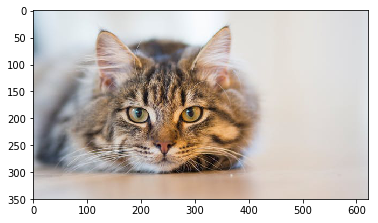

{'success': True, 'predictions': [{'label': 'tiger_cat', 'probability': 0.5162395238876343}, {'label': 'tabby', 'probability': 0.42556288838386536}, {'label': 'lynx', 'probability': 0.04065455123782158}, {'label': 'Egyptian_cat', 'probability': 0.008788399398326874}, {'label': 'plastic_bag', 'probability': 0.0014036423526704311}]}


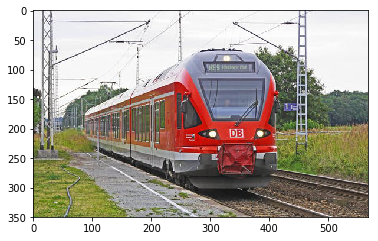

{'success': True, 'predictions': [{'label': 'electric_locomotive', 'probability': 0.6239250302314758}, {'label': 'passenger_car', 'probability': 0.2927480936050415}, {'label': 'streetcar', 'probability': 0.07656334340572357}, {'label': 'freight_car', 'probability': 0.004178313072770834}, {'label': 'steam_locomotive', 'probability': 0.0022669180762022734}]}


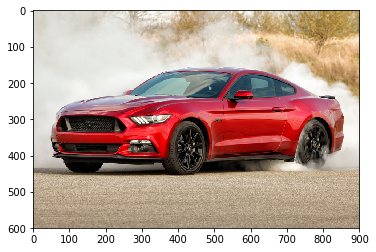

{'success': True, 'predictions': [{'label': 'sports_car', 'probability': 0.5883085131645203}, {'label': 'racer', 'probability': 0.10747983306646347}, {'label': 'convertible', 'probability': 0.09252016991376877}, {'label': 'car_wheel', 'probability': 0.09132739901542664}, {'label': 'grille', 'probability': 0.04690460488200188}]}


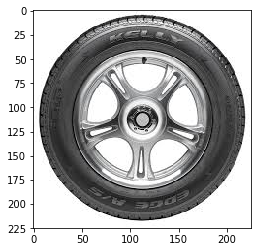

{'success': True, 'predictions': [{'label': 'disk_brake', 'probability': 0.7126301527023315}, {'label': 'car_wheel', 'probability': 0.2665152847766876}, {'label': 'wall_clock', 'probability': 0.003392045386135578}, {'label': 'dial_telephone', 'probability': 0.0030477081891149282}, {'label': 'loudspeaker', 'probability': 0.002123082522302866}]}


In [19]:
imgList = ["simple-keras-rest-api/dog.jpg",\
          "simple-keras-rest-api/cat.jpg",\
          "simple-keras-rest-api/train.jpg",\
          "simple-keras-rest-api/car.jpg",\
          "simple-keras-rest-api/tire.jpg"]
demo(imgList)